# Facebook Ad-Campaign Analysis

In [1]:
import pandas as pd

df = pd.read_csv('sales-data.csv')
df.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0


According to the author:

 - ad_id: an unique ID for each ad.

 - xyzcampaignid: an ID associated with each ad campaign of XYZ company.

 - fbcampaignid: an ID associated with how Facebook tracks each campaign.

 - age: age of the person to whom the ad is shown.

 - gender: gender of the person to whim the add is shown

 - interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

 - Impressions: the number of times the ad was shown.

 - Clicks: number of clicks on for that ad.

 - Spent: Amount paid by company xyz to Facebook, to show that ad.

 - Total conversion: Total number of people who enquired about the product after seeing the ad.

 - Approved conversion: Total number of people who bought the product after seeing the ad.

Remove the underscores from the column names and capitalize the first letter of each word of the column name, then change some of the column names to be easier to understand.

In [2]:
df = df.rename(columns={cname: " ".join([word.capitalize() for word in cname.split('_')]) for cname in df.columns})
df = df.rename(columns={'Ad Id': 'Ad ID', 'Xyz Campaign Id': 'Company Campaign ID', 
                        'Fb Campaign Id': 'FB Campaign ID', 'Total Conversion': 'Inquiries', 'Approved Conversion': 'Sales'})

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ad ID                1143 non-null   int64  
 1   Company Campaign ID  1143 non-null   int64  
 2   FB Campaign ID       1143 non-null   int64  
 3   Age                  1143 non-null   object 
 4   Gender               1143 non-null   object 
 5   Interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Inquiries            1143 non-null   int64  
 10  Sales                1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [4]:
df.shape

(1143, 11)

Since there each column has a 1143 non-null count and there are 1143 rows in the dataset there are non null values in the data to clean/fill.

In [5]:
df.describe()

,Ad ID,Company Campaign ID,FB Campaign ID,Interest,Impressions,Clicks,Spent,Inquiries,Sales
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


 - Min sales per ad is 0
 - Max sales per ad is 21
 - Conversion rate between clicking on the ad and buying the product is roughly 3%
 - Conversion rate between enquiring and selling is roughly 33%

Lets create a group of categorical and continuous data.

In [6]:
categorical = [cname for cname in df.columns if df[cname].dtype == 'object']
categorical

['Age', 'Gender']

In [7]:
numerical = [cname for cname in df.columns if df[cname].dtype != 'object']
numerical

['Ad ID',
 'Company Campaign ID',
 'FB Campaign ID',
 'Interest',
 'Impressions',
 'Clicks',
 'Spent',
 'Inquiries',
 'Sales']

Lets view the correlations between the data.

Text(0.5, 1.0, 'Numerical correlations')

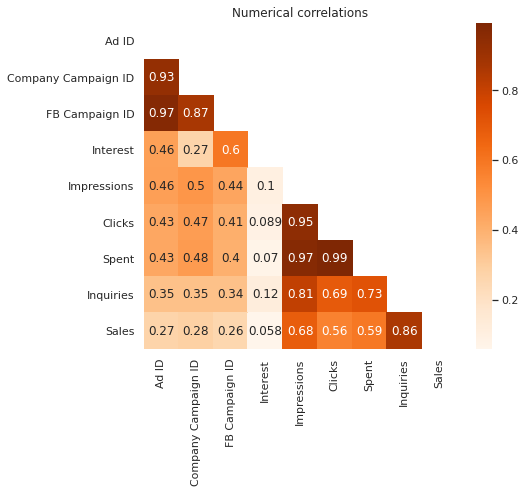

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style='whitegrid')

corr = df[numerical].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(7, 6))
cor_heatmap = sns.heatmap(corr, mask=mask, annot=True, cmap='Oranges')
cor_heatmap.set_title('Numerical correlations')

Strong correlations between:
 - Clicks and Impressions
 - Spent and Impressions
 - Spent and Clicks
 - Total_Conversion and Impressions
 - Total_Conversion and Clicks
 - Total_Conversion and Spent
 - Approved_Conversion and Impressions
 - Approved_Conversion and Clicks
 - Approved_Conversion and Spent
 - Approved_Conversion and Total_Conversion

Let's plot the distributions of the numerical columns to find if some are secretly categorical.

Text(0.5, 1.0, 'Frequency of Facebook Ad IDs')

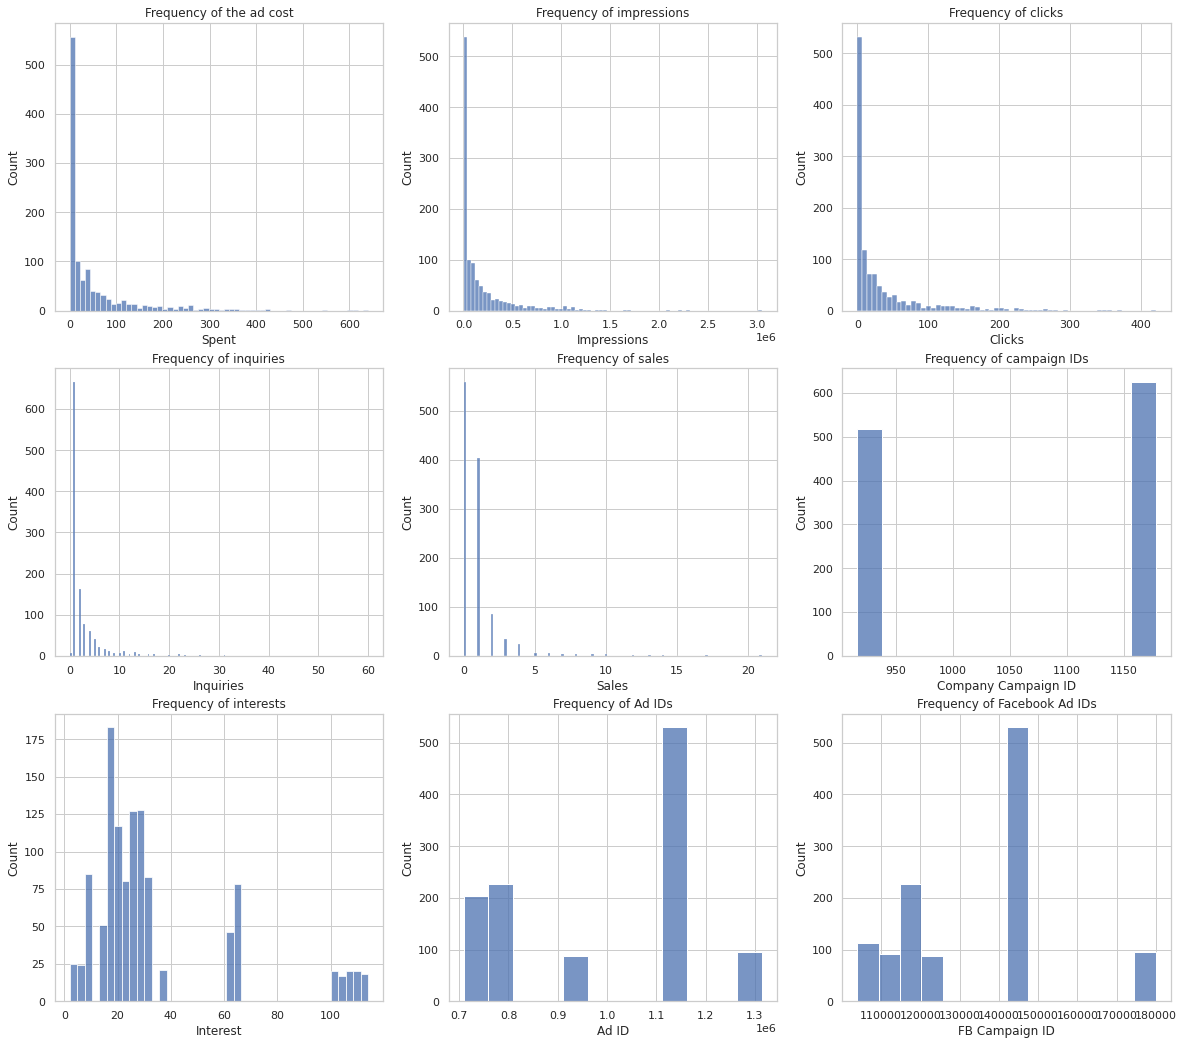

In [9]:
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(20, 18)

spent = sns.histplot(x='Spent', data=df, ax=axs[0][0])
spent.set_title('Frequency of the ad cost')

impressions = sns.histplot(x='Impressions', data=df, ax=axs[0][1])
impressions.set_title('Frequency of impressions')

clicks = sns.histplot(x='Clicks', data=df, ax=axs[0][2])
clicks.set_title('Frequency of clicks')

inquiries = sns.histplot(x='Inquiries', data=df, ax=axs[1][0])
inquiries.set_title('Frequency of inquiries')

sales = sns.histplot(x='Sales', data=df, ax=axs[1][1])
sales.set_title('Frequency of sales')

company_campaign_ids = sns.histplot(x='Company Campaign ID', data=df, ax=axs[1][2])
company_campaign_ids.set_title('Frequency of campaign IDs')

interest_count = sns.histplot(x='Interest', data=df, ax=axs[2][0])
interest_count.set_title('Frequency of interests')

ad_id = sns.histplot(x='Ad ID', data=df, ax=axs[2][1])
ad_id.set_title('Frequency of Ad IDs')

fb_campaign_id = sns.histplot(x='FB Campaign ID', data=df, ax=axs[2][2])
fb_campaign_id.set_title('Frequency of Facebook Ad IDs')

Most of the distributions appear to be zero centered except for:
 - Company Campaign ID's
 - Interests
 - Ad ID's
 - Facebook Ad ID's
 
 which due to the shapes of their distributions fitting into defined categories appear to be categorical. Let's investigate this.

To do this let's take the number of unique values in the main dataframe 'df' and the unique values for each column and make it into it's own seperate dataframe to determine if the data is categorical or not.

In [10]:
categorical_hypothesis_cols = ['Company Campaign ID', 'Interest', 'Ad ID', 'FB Campaign ID']
categorical_hypothesis_dic = {'Column Name': categorical_hypothesis_cols, 
       'Number Of Unique Values': [df[cname].nunique() for cname in categorical_hypothesis_cols], 
       'Unique Values': [df[cname].unique() for cname in categorical_hypothesis_cols]}
categorical_hypothesis_df = pd.DataFrame(categorical_hypothesis_dic)

categorical_hypothesis_df

,Column Name,Number Of Unique Values,Unique Values
0,Company Campaign ID,3,"[916, 936, 1178]"
1,Interest,40,"[15, 16, 20, 28, 29, 27, 31, 7, 30, 24, 21, 32..."
2,Ad ID,1143,"[708746, 708749, 708771, 708815, 708818, 70882..."
3,FB Campaign ID,691,"[103916, 103917, 103920, 103928, 103929, 10394..."


It can be seen that there are 3 unique 'Company Campaign ID' values despite there being 1143 values given, meaning that it is likely to be categorical. This goes for the 'Interest' column too, as there are only 40 unique interests, despite there being 1143 values given. This means that it is most likely categorical too. The 'FB Campaign ID' column is most likely non-categorical based on the number of unique values, most likely occuring due to reused ID's, as it was stated in the description of the column that the Facebook Campaign ID's were not unique and was just how Facebook tracks a campaign. All of the values are unique for the 'Ad ID' column, therefore resulting in it being non-categorical.

Let's update the categorical and numerical lists given these results.

In [11]:
categorical.append('Company Campaign ID')
numerical.remove('Company Campaign ID')
categorical.append('Interest')
numerical.remove('Interest')

In [12]:
categorical

['Age', 'Gender', 'Company Campaign ID', 'Interest']

In [13]:
numerical

['Ad ID',
 'FB Campaign ID',
 'Impressions',
 'Clicks',
 'Spent',
 'Inquiries',
 'Sales']

### Who are clicking on the products?

Find out the ages and genders that are clicking on the products.

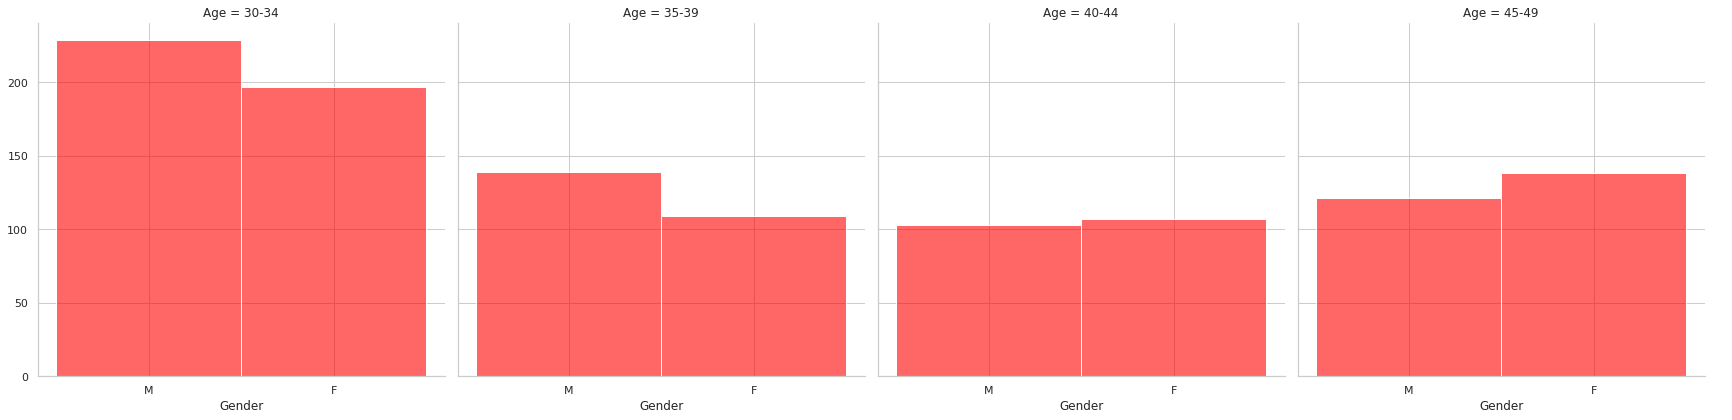

In [14]:
gender_count = sns.FacetGrid(col='Age', data=df, height=6)
gender_count.map(sns.histplot, 'Gender', alpha=0.6, color='red')
gender_count.add_legend()

 - For ages 30-34 there are more ads shown to males than females
 - For ages 35-39 there are more ads shown to males than females
 - For ages 40-44 there are slightly more ads shown to females than males
 - For ages 45-49 there are more ads shown to females than males

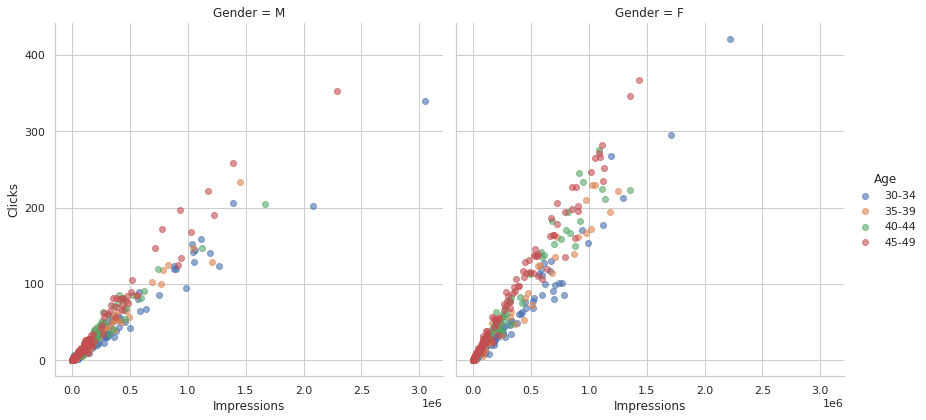

In [15]:
impressions_clicks = sns.FacetGrid(col='Gender', hue='Age', data=df, height=6)
impressions_clicks.map(plt.scatter, 'Impressions', 'Clicks', alpha=0.6)
impressions_clicks.add_legend()

It appears that females are more likely to click on advertisements than males for all age groups.

Let's find out who is more likely to buy the product once they have clicked on the ad.

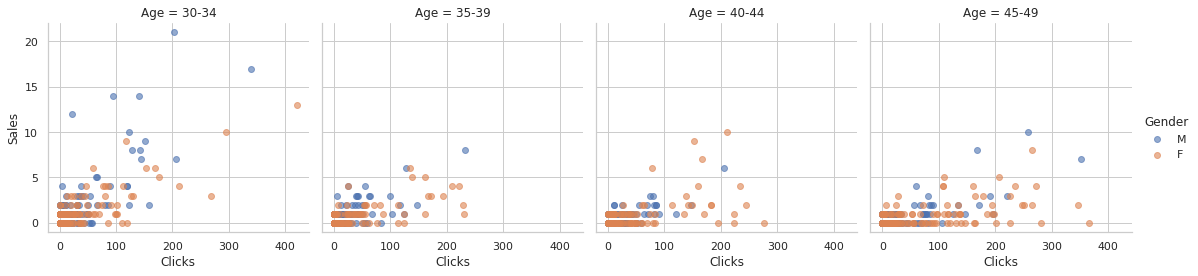

In [16]:
clicks_sales = sns.FacetGrid(col='Age', hue='Gender', data=df, height=4)
clicks_sales.map(plt.scatter, 'Clicks', 'Sales', alpha=0.6)
clicks_sales.add_legend()

It can be seen that males on average are more likely to buy a product after clicking on an ad. This means that advertising teams should focus more on targetting males rather than females to increase their conversion rates. This has not been considered for age groups 40-44 and 45-49 as the amount of female targetted ads is greater than the amount of male targetted ads.

Let's compare the impressions and clicks for all age demographics.

Text(0.5, 1.0, 'Clicks vs impressions for age demographics')

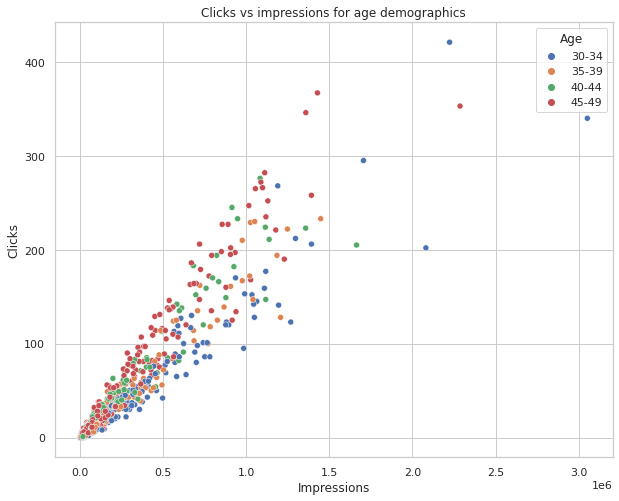

In [17]:
plt.figure(figsize=(10, 8))
impressions_clicks = sns.scatterplot(x='Impressions', y='Clicks', hue='Age', data=df)
impressions_clicks.set_title('Clicks vs impressions for age demographics')

It can be seen that there is a trend between the older demographics having a higher click rate than younger demographics. Let's confirm this by plotting a barchart of the clicks for each age demographic.

Text(0.5, 1.0, 'Clicks for each age demographic')

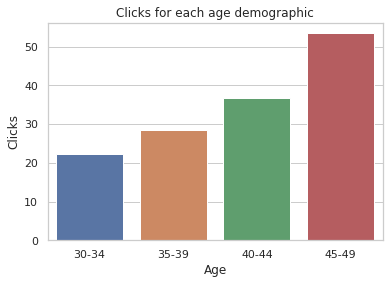

In [18]:
age_clicks = sns.barplot(x='Age', y='Clicks', data=df, ci=None)
age_clicks.set_title('Clicks for each age demographic')

This proves our hypothesis that the amount of ad clicks increases with the age demographic of the target.

Let's compare the clicks and approved conversions for all age demographics.

Text(0.5, 1.0, 'Clicks vs sales for age demographics')

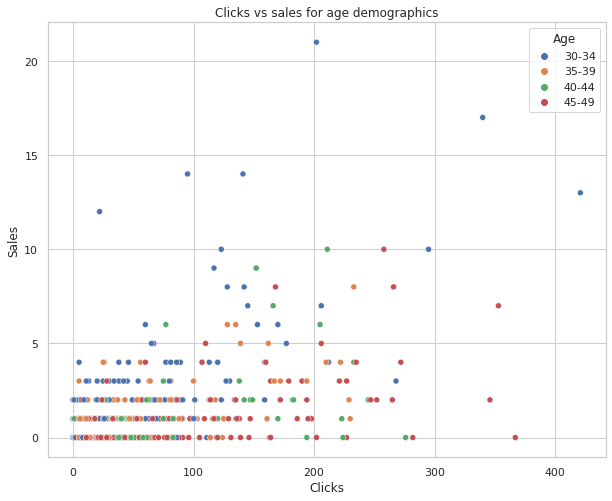

In [19]:
plt.figure(figsize=(10, 8))
clicks_approve = sns.scatterplot(x='Clicks', y='Sales', hue='Age', data=df)
clicks_approve.set_title('Clicks vs sales for age demographics')

This is difficult to understand, so let's make a barchart to see the trend between the age demographic and buying a sale.

Text(0.5, 1.0, 'Sales for each age demographic')

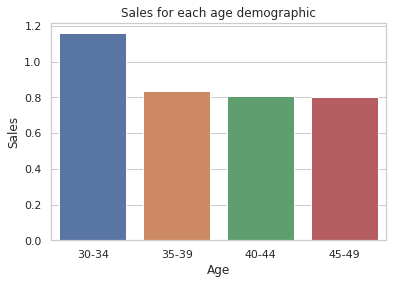

In [20]:
age_approved = sns.barplot(x='Age', y='Sales', data=df, ci=None)
age_approved.set_title('Sales for each age demographic')

It can be seen that 30-34 year olds are most likely to buy a product once they have clicked on the ad, despite having the lowest chance of clicking on the ad. This means that advertisers should market more towards this age demographic and getting them to click the ad, because once they do they have a much greater chance of going through with the purchase. Let's confirm this hypothesis below.

In [21]:
age_grouped_sum = df.groupby('Age').sum()
age_grouped_sum['Age'] = age_grouped_sum.index
age_grouped_sum['Conversion Rate'] = age_grouped_sum['Sales'] / age_grouped_sum['Clicks']
age_grouped_sum.head(10)

,Ad ID,Company Campaign ID,FB Campaign ID,Interest,Impressions,Clicks,Spent,Inquiries,Sales,Age,Conversion Rate
Age,,,,,,,,,,,
30-34,408217251,446798,55578967,13130,67993019,9483,15252.399986,1431,494,30-34,0.052093
35-39,248991376,267462,33575031,8400,42104644,7094,11112.429994,626,207,35-39,0.029180
40-44,212766296,227658,28775757,7230,39604307,7736,11589.729981,523,170,40-44,0.021975
45-49,258464549,278100,34985345,8692,63732858,13852,20750.669997,684,208,45-49,0.015016


Text(0.5, 1.0, 'Conversion rate for each age demographic')

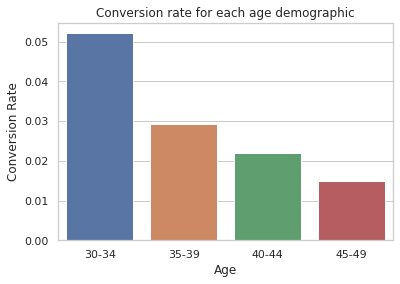

In [22]:
age_conversion= sns.barplot(x='Age', y='Conversion Rate', data=age_grouped_sum, ci=None)
age_conversion.set_title('Conversion rate for each age demographic')

Thus it confirms that the 30-34 year old age demographic has the highest conversion rate. It also follows that the conversion rate decreases as the age demographic increases, meaning that advertisers should target their ads at a younger demographic to increase sales.

### What type of person is most likely to make a sale?

We're going to find out the what the most popular product types are.

Since we know that the 'Interest' column is categorical, let's convert the numbers representing each unique category to their own special named category.

In [23]:
df['Interest'] = df['Interest'].replace({cname: f"Interest_{i+1}" for i, cname in enumerate(df['Interest'].unique())})

Let's view the average amount of clicks and the average amount of sales for each interest over all demographics.

Text(0.5, 1.0, 'Sales vs interest')

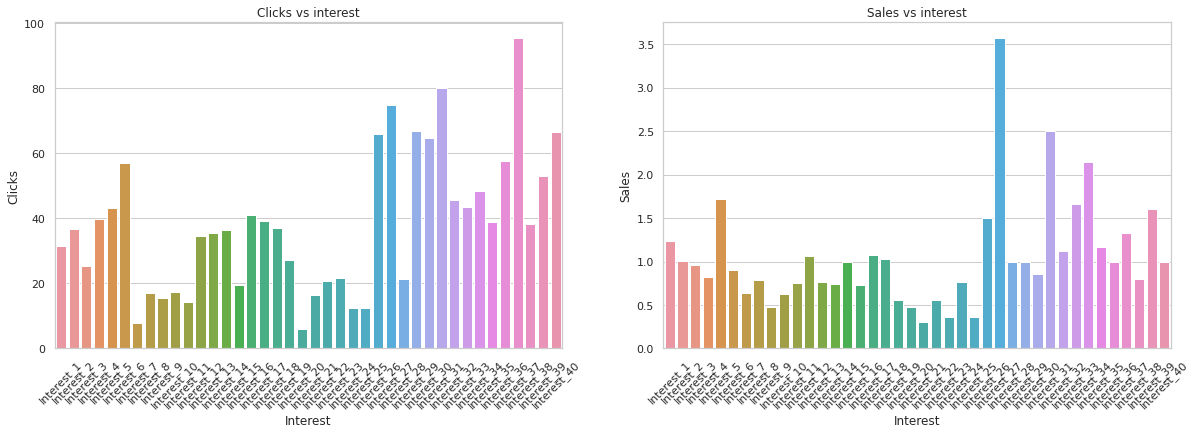

In [24]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20, 6)

interest_clicks = sns.barplot(x='Interest', y='Clicks', data=df, ax=axs[0], ci=None)
interest_clicks.set_xticklabels(interest_clicks.get_xticklabels(), rotation=45)
interest_clicks.set_title('Clicks vs interest')

interest_sales = sns.barplot(x='Interest', y='Sales', data=df, ax=axs[1], ci=None)
interest_sales.set_xticklabels(interest_clicks.get_xticklabels(), rotation=45)
interest_sales.set_title('Sales vs interest')

Before we analyse the two let's plot the average conversion rate as well, which is the sales / clicks. However if the amount of clicks is 0, then sales / 0 = inf, so in this case we will set the conversion rate to be 0.

In [25]:
df['Conversion Rate'] = df['Sales'] / df['Clicks']
df['Conversion Rate'] = df['Conversion Rate'].apply(lambda x: 0 if np.isinf(x) or np.isnan(x) else x)

Text(0.5, 1.0, 'Conversion rate vs interest')

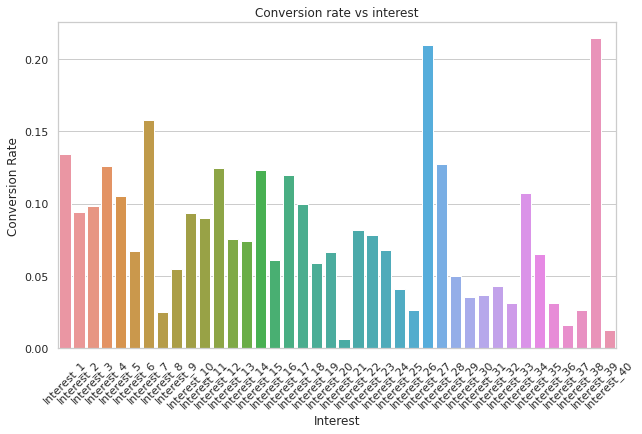

In [26]:
fig, axs = plt.subplots(figsize=(10, 6))
interest_conversion_rate = sns.barplot(x='Interest', y='Conversion Rate', data=df, ci=None)
interest_conversion_rate.set_xticklabels(interest_clicks.get_xticklabels(), rotation=45)
interest_conversion_rate.set_title('Conversion rate vs interest')

From the 3 charts it can be seen that the interest with the highest amount of clicks is 'Interest_36', meaning that this interest is either popular among a large amount of people, or that people with this interest are more likely to click on ads. Either way advertisers should focus more on getting people with this interest to convert to increase their sales. 'Interest_26' has the highest amount of sales, meaning that products related to 'Interest_26' could be the most useful or most in demand, or could be a hot trend. 'Interest_38' has the highest conversion rate followed closely by 'Interest_26'. This means that advertisers should focus more on targetting people with one or both of these interests, as they have the highest chance of buying the product once they have clicked on the ad.

Let's find the interest that had occured the most for each interest for each age demographic and gender demographic.

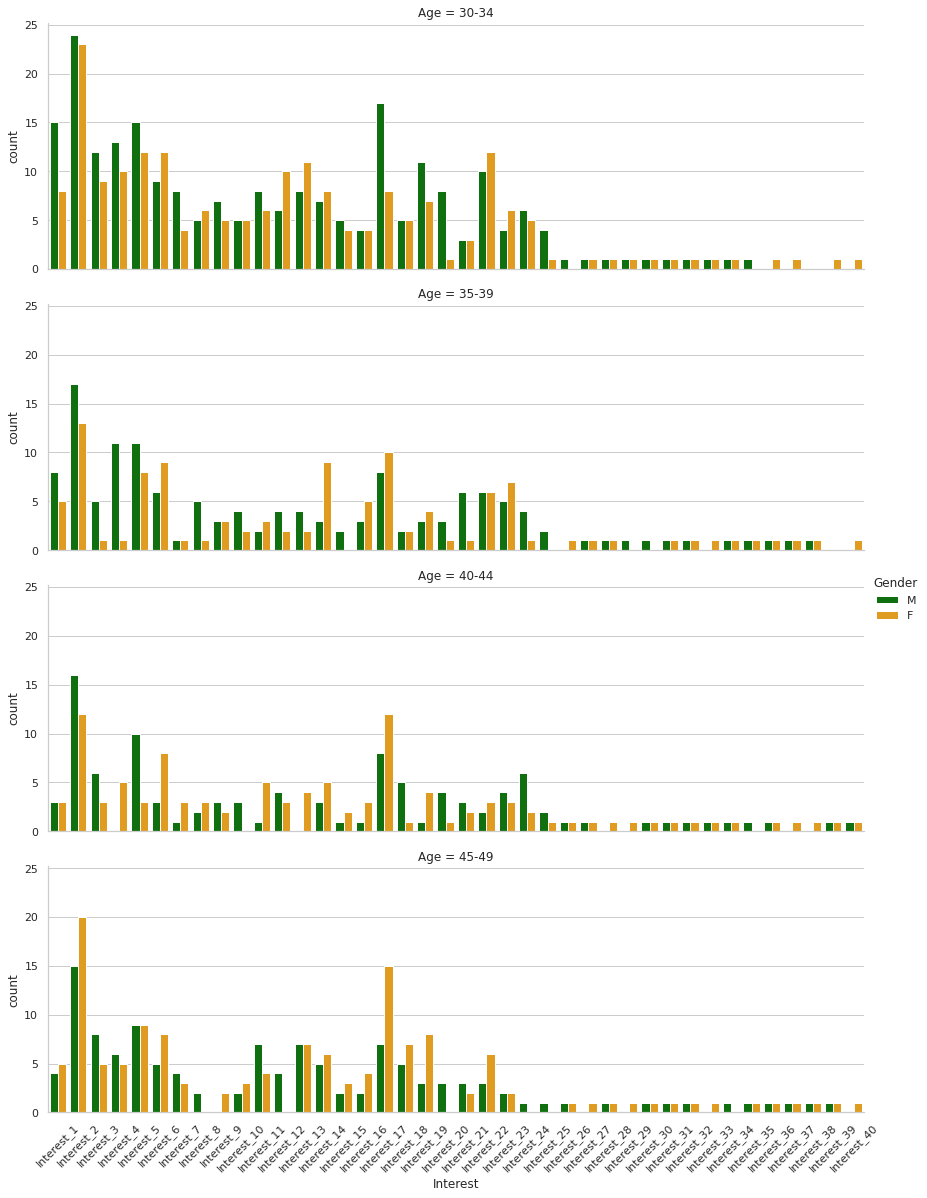

In [81]:
interest_count = sns.catplot(x='Interest', hue='Gender', row='Age', data=df, kind='count', palette=['green', 'orange'], height=4, aspect=3)
interest_count.set_xticklabels(rotation=45)

Let's compare the clicks against the interests for the demographics of age and gender.

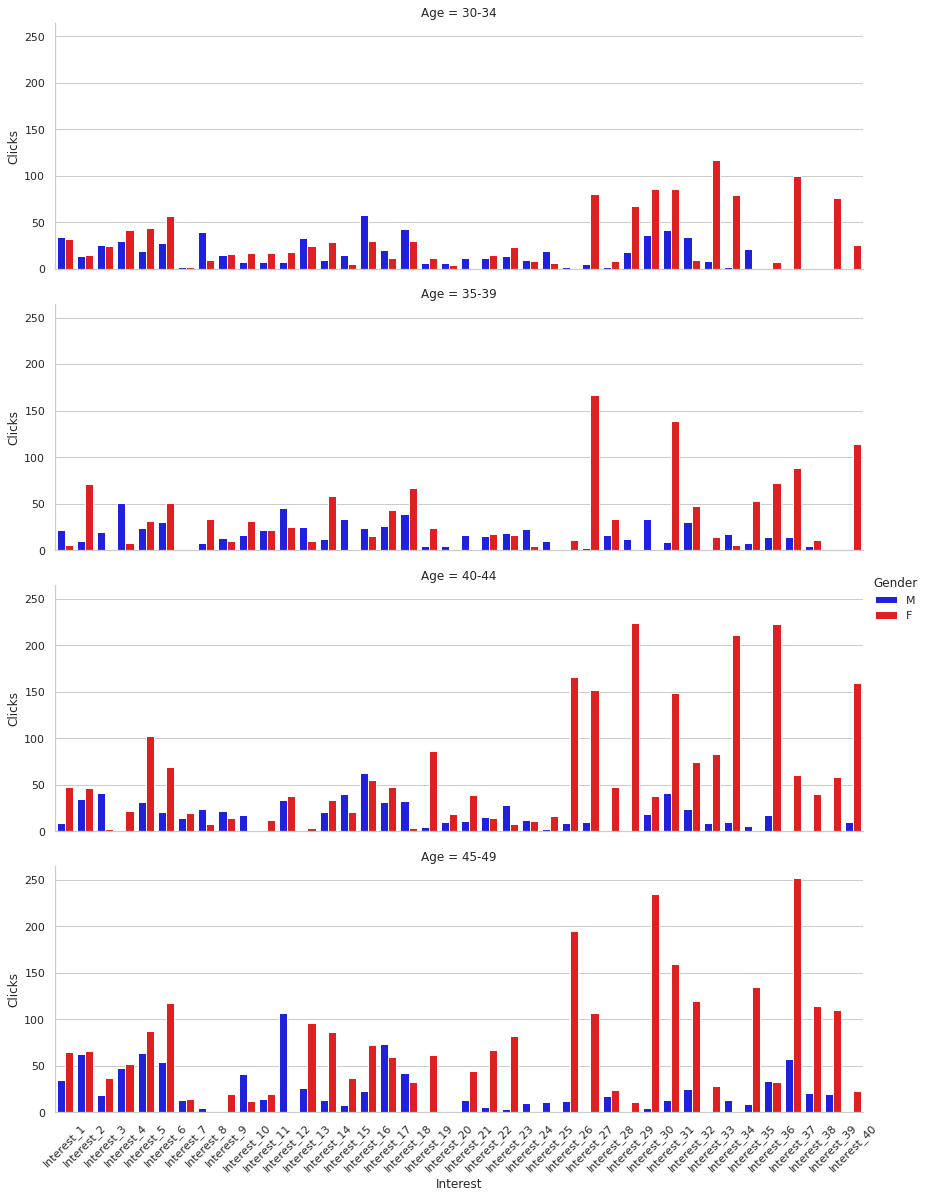

In [79]:
interest_clicks = sns.catplot(x='Interest', y='Clicks', hue='Gender', row='Age', data=df, kind='bar', palette=['blue', 'red'], height=4, aspect=3, ci=None)
interest_clicks.set_xticklabels(rotation=45)

Let's compare the sales against the interests for the demographics of age and gender.

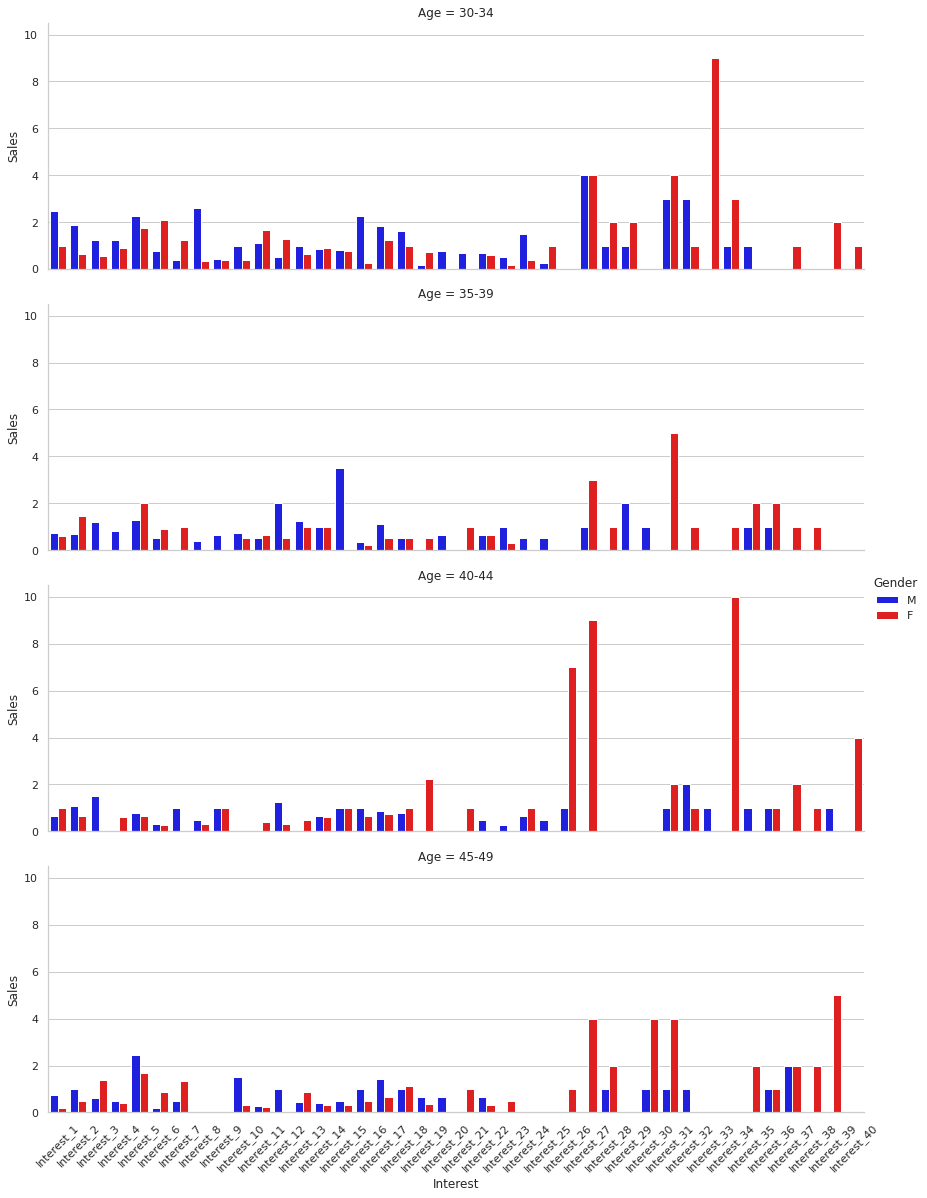

In [80]:
interest_sales = sns.catplot(x='Interest', y='Sales', hue='Gender', row='Age', data=df, kind='bar', palette=['blue', 'red'], height=4, aspect=3, ci=None)
interest_sales.set_xticklabels(rotation=45)

Let's compare the conversion rate against the interests for the demographics of age and gender.

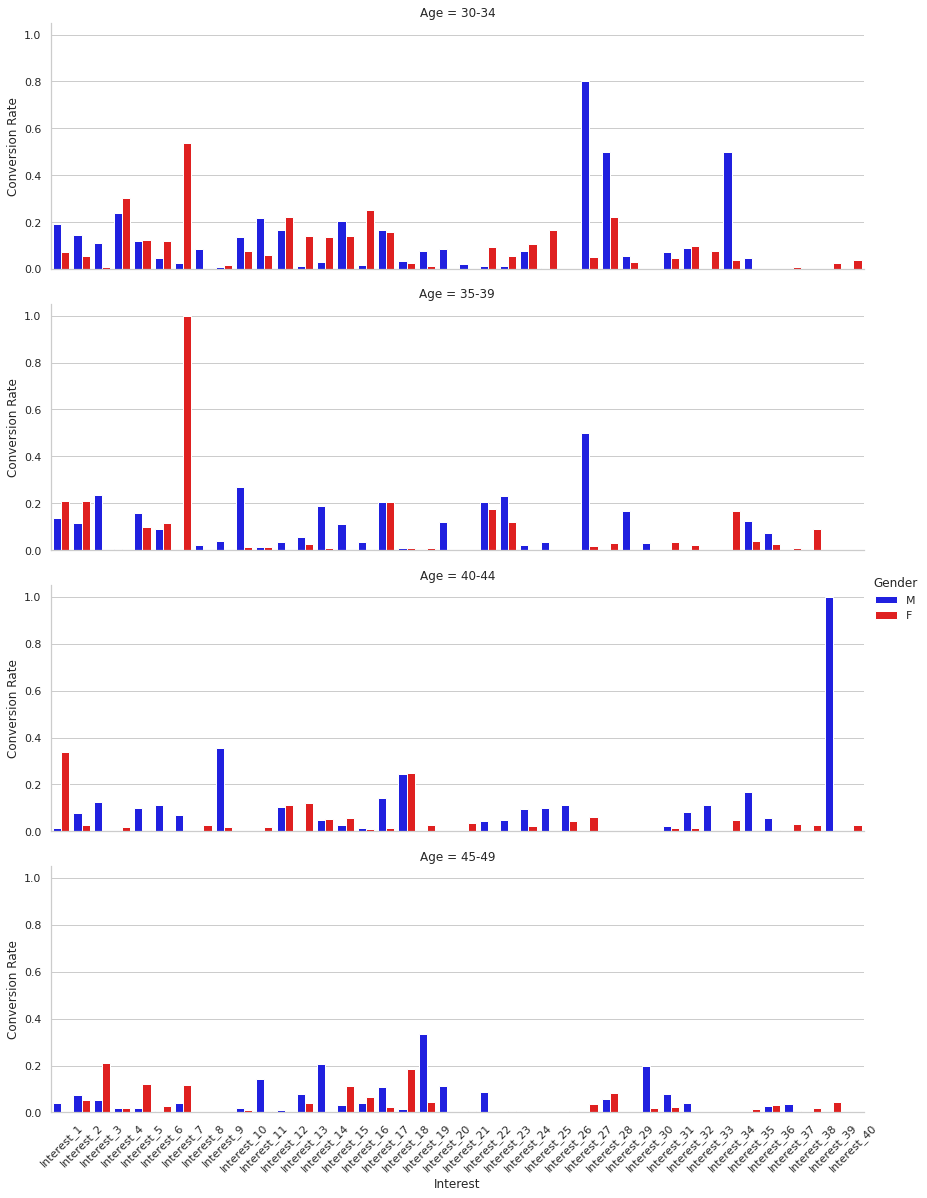

In [82]:
interest_conversion_rate = sns.catplot(x='Interest', y='Conversion Rate', hue='Gender', row='Age', data=df, kind='bar', palette=['blue', 'red'], height=4, aspect=3, ci=None)
interest_conversion_rate.set_xticklabels(rotation=45)

### How did the campaigns of each company compare to each other?